In [14]:
import numpy as np
from parameters import Parameters
from mobility_functions import Mobility_Functions
import matplotlib.pyplot as plt
import random

In [42]:
obstacles = r_o = np.array([[20, 40], [40, 60], [60, 40], [80, 60], [100, 60], [120, 40], [150, 60], [190, 60]])
r_d = start = np.array([150, 20])
goal = np.array([5, 50])
OBSTACLE_THRESHOLD = 10
GRID_SIZE = 100
NUM_OBSTACLES = 8
step_size_t = 5
Max_iter = 20000

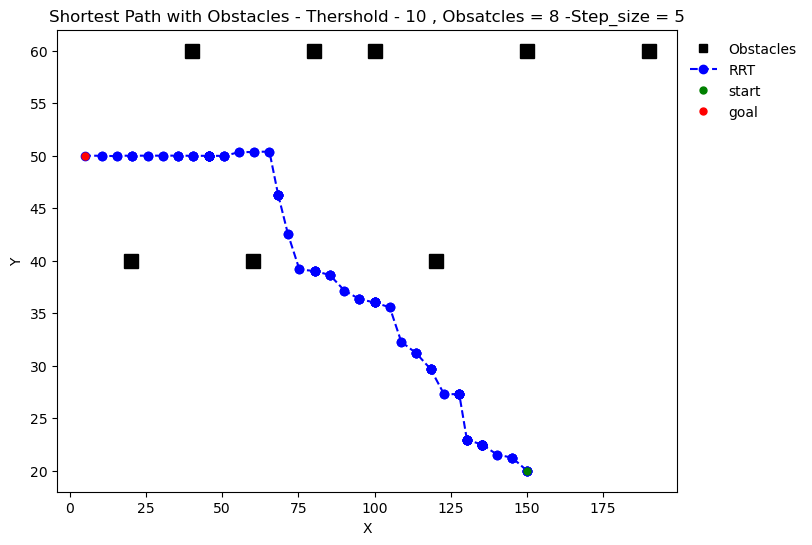

In [44]:
"""
function to genrate random  points near the specified location
"""

def generate_random_point(latest_node,goal,max_offset = step_size_t):
    
    off_set = np.random.rand(2) * max_offset
    direction_vect = goal - latest_node
    unit_direct = direction_vect / np.linalg.norm(direction_vect)
    return latest_node + off_set * unit_direct


"""
function to check if collisions
"""
def is_collision(point):
    
    for obstacle in obstacles:
        if np.linalg.norm(point - obstacle) < OBSTACLE_THRESHOLD:
            return True
    return False        

"""
functions to get nearest node
"""

def find_nearest_node(tree,point):
    
    distances = [np.linalg.norm(node - point) for node in tree]
    return tree[np.argmin(distances)]    

"""
function to extend the tree

"""

def extend_tree(tree, nearest_node, new_point, goal, step_size):
    direction = new_point - nearest_node
    distance = np.linalg.norm(direction)
    new_node = nearest_node + step_size * (direction / distance)
    
    if not is_collision(new_node):   
        if np.linalg.norm(new_node - goal) <= step_size:
            return goal
        elif any(np.linalg.norm(new_node - node) < step_size for node in tree):
            return nearest_node
        return new_node            
    else:
        return np.array([np.nan,np.nan])
                 
                 
        

"""
RRT
"""


def RRT(start,goal,max_iterations = Max_iter,step_size = step_size_t):
    tree =[start]
    for _ in range(1,max_iterations):
        latest_node = tree[-1]
        rand_point = generate_random_point(latest_node,goal)
        nearest_node = find_nearest_node(tree,rand_point)
        new_node = extend_tree(tree,nearest_node,rand_point,goal,step_size)
        
        if (np.isnan(new_node[0]) and np.isnan(new_node[1])):
            continue
            
        elif np.allclose(new_node,goal):
            tree.append(new_node)
            return tree
        tree.append(new_node)
    return tree
    
            
            
        
    

"""
plotm RRT
"""

def plot_shortest_path(tree, start, goal):
    # shortest_path = find_shortest_path(tree, start, goal)
    # shortest_path = find_short_path(tree, start, goal, obstacles)
    # print(shortest_path)
    plt.figure(figsize=(8, 6))
    # Plot obstacles
    for obstacle in obstacles:
        plt.plot(obstacle[0], obstacle[1], 'ks', markersize=OBSTACLE_THRESHOLD)
    plt.plot([],[] , 'ks', label='Obstacles')
    # Plot RRT tree
    for i in range(len(tree) - 1):
        plt.plot([tree[i][0], tree[i+1][0]], [tree[i][1], tree[i+1][1]], color='b',linestyle='dashed',marker ='o')
    # Plot shortest path
    plt.plot([],[],color='b',linestyle='dashed',label='RRT',marker='o')
    # for i in range(len(shortest_path) - 1):
    #     plt.plot([shortest_path[i][0], shortest_path[i+1][0]], [shortest_path[i][1], shortest_path[i+1][1]], 'r-', linewidth=2)
    # plt.plot([], [], 'r-',linewidth=2, label='opt_path')
    plt.plot(start[0], start[1], 'go', markersize=5,label='start') # start green start
    plt.plot(goal[0], goal[1], 'ro', markersize=5,label='goal')
    # plt.xlim(0, GRID_SIZE)
    # plt.ylim(0, GRID_SIZE)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Shortest Path with Obstacles - Thershold - {OBSTACLE_THRESHOLD} , Obsatcles = {len(obstacles)} -Step_size = {step_size_t}')
    # plt.tight_layout()
    plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
    # plt.savefig(f"obs_{len(obstacles)}_thersh_{OBSTACLE_THRESHOLD}_step_{step_size_t}.png",dpi=300)
    plt.show()


path = RRT(r_d,goal)
plot_shortest_path(path,r_d,goal)